In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
df = joblib.load('salidas/df_historicos_transf.pkl')
y = joblib.load('salidas/v.respuesta.pkl')

# <font color = '056938'> Selección de Variables
---

## <font color = '157699'> Métodos de Ensamble

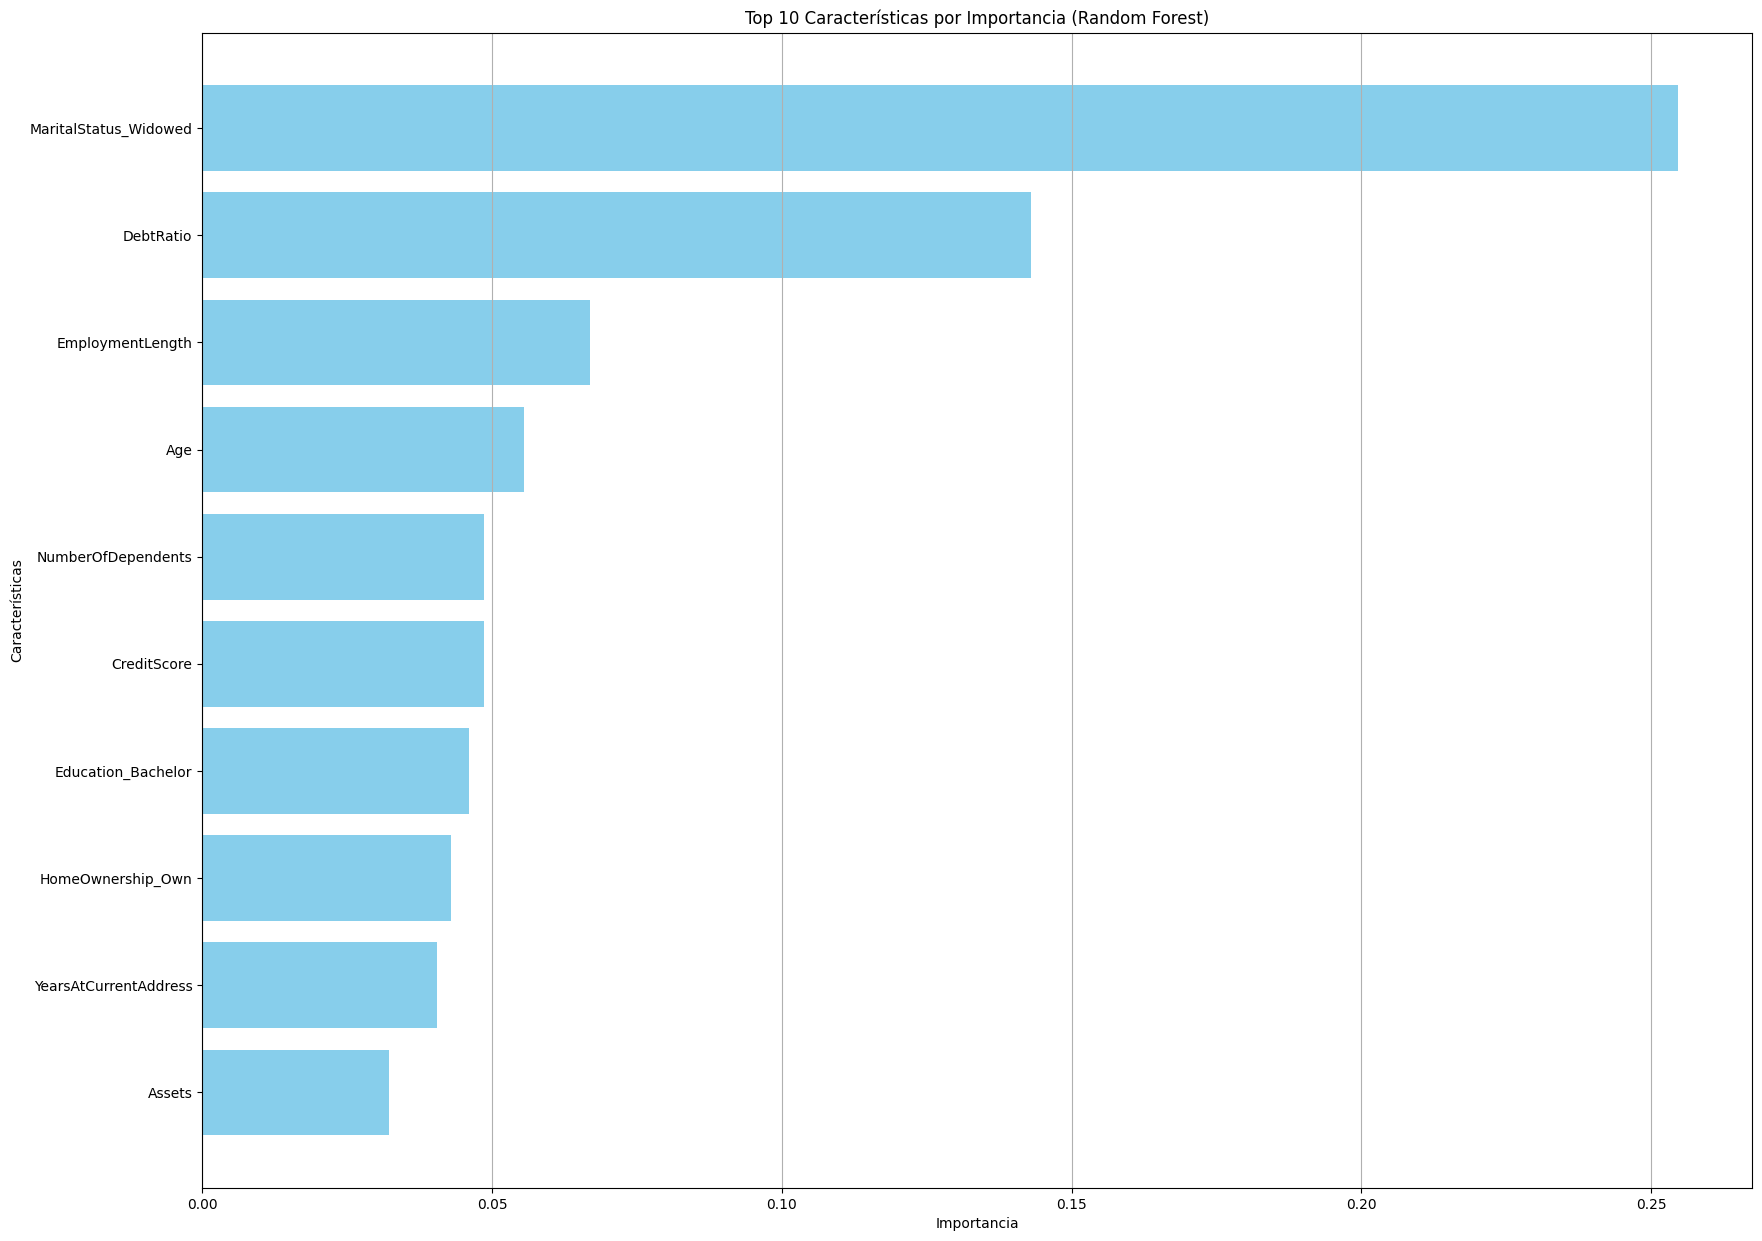

                  Feature  Importance
20  MaritalStatus_Widowed    0.254721
1               DebtRatio    0.143023
8        EmploymentLength    0.066874
3                     Age    0.055508
4      NumberOfDependents    0.048680
0             CreditScore    0.048619
13     Education_Bachelor    0.046091
11      HomeOwnership_Own    0.042933
9   YearsAtCurrentAddress    0.040436
2                  Assets    0.032150


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = joblib.load('salidas/df_historicos_transf.pkl')
y = joblib.load('salidas/v.respuesta.pkl')

# Alinear índices de muestra
sample_indices = df.sample(frac=0.9, random_state=42).index
X_sample = df.loc[sample_indices]
y_sample = y.loc[sample_indices]

# Verificar si la variable respuesta es continua o discreta
if y_sample.dtype in ['float64', 'float32']:  # Si es continua, usar regresión
    rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
else:  # Si es discreta, usar clasificación
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el modelo
rf_model.fit(X_sample, y_sample)

# Importancia de las características
feature_importances = rf_model.feature_importances_

# Crear DataFrame con importancias
feature_importance_df = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar las principales características
top_features = feature_importance_df.head(10)

plt.figure(figsize=(20, 15))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.title("Top 10 Características por Importancia (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

print(top_features)


## <font color = '157699'> Métodos Wrapper 

In [23]:
import statsmodels.api as sm

# Agregar una columna de intercepto a los datos
X = sm.add_constant(df)  # Asegurarse de que 'df' sea un DataFrame

def backward_elimination(X, y, significance_level=0.05):
    # Copiar los nombres de las columnas
    features = list(X.columns)
    
    while len(features) > 0:
        # Crear el modelo OLS (Ordinary Least Squares)
        model = sm.OLS(y, X[features]).fit()
        
        # Obtener el valor p para cada característica
        p_values = model.pvalues
        
        # Encontrar la característica con el valor p más alto
        max_p_value = p_values.max()
        
        if max_p_value > significance_level:
            # Eliminar la característica con el valor p más alto
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Eliminando {excluded_feature} con p-value {max_p_value}")
        else:
            break
    
    # Retornar las características seleccionadas
    selected_features = features
    print("Características seleccionadas:", selected_features)
    return selected_features

# Ejecutar backward elimination
selected_features = backward_elimination(X, y)

print("Características finales seleccionadas:", selected_features)


Eliminando MaritalStatus_Married con p-value 0.2143861228695368
Eliminando const con p-value 0.19118241035963585
Características seleccionadas: ['CreditScore', 'DebtRatio', 'Assets', 'Age', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'NumberOfTimesPastDue', 'EmploymentLength', 'YearsAtCurrentAddress', 'HomeOwnership_Mortgage', 'HomeOwnership_Own', 'HomeOwnership_Rent', 'Education_Bachelor', 'Education_High School', 'Education_Masters', 'Education_PhD', 'MaritalStatus_Divorced', 'MaritalStatus_Single', 'MaritalStatus_Widowed']
Características finales seleccionadas: ['CreditScore', 'DebtRatio', 'Assets', 'Age', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'NumberOfTimesPastDue', 'EmploymentLength', 'YearsAtCurrentAddress', 'HomeOwnership_Mortgage', 'HomeOwnership_Own', 'HomeOwnership_Rent', 'Education_Bachelor', 'Education_High School', 'Education_Masters', 'Education_PhD', 'MaritalStatus_Divorced', 'MaritalStatus_Single', 'Marit

In [ ]:
# Lista de variables seleccionadas
selected_features = [
    'CreditScore', 'DebtRatio', 'Assets', 'Age', 
    'NumberOfDependents', 'EmploymentLength', 
    'YearsAtCurrentAddress', 'HomeOwnership_Own', 
    'MaritalStatus_Widowed', 'Education_Bachelor'
]

# Filtrar el DataFrame con las variables seleccionadas
filtered_df = df[selected_features]

# Exportar el DataFrame utilizando joblib
joblib.dump(filtered_df, "salidas/df_filtrado.pkl")

['salidas/df_filtrado.pkl']